# Clustering

In this session we are going to implement the clustering algorithm K-Means and Hierarchical Clustering.

# Problem Statement:

## Given a shopping dataset, which contains CustomerID, gender, Income, Age, Annual Income and Spending score. We will now perform Clustering algorithms based on Annual_Income and Spending_Score to segrigate customers into different clusters in following steps. 


### For K-Means Clustering

1. Load the `shopping.csv` file uisng Pandas.
2. Check the desriptive analysis of the data, and do changes if required.

3. Perform k-means clustering with 5 clusters using sklearn library
4. Print the cluster centers
5. Attach clusters to the original data.
6. Plot the Clusters using `matplotlib`.


### For-Hierarchical Clustering.

1. Segrigate both the columns `Annual_Income` and `Spending_score` from the dataset.
2. Use `Aglomarative` `Hierarchical` clustering with 5 clusters using sklearn library on the segrigated data
3. Plot the clusters using matplotlib.

# K-Means Clustering

In [1]:
# Imporitng Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the dataset

df = pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# renaming the columns Annual income and spending score 

df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Genre,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Checking descriptive analysis

df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# performing k-means clustring with 5 clusters
# import KMeans

from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [7]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ]])

In [8]:
df['Clusters'] = kmeans.labels_
df.head()

,CustomerID,Genre,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [9]:
# If you want to check how many values has been assigned

df['Clusters'].value_counts()

0    81
3    39
4    35
2    23
1    22
Name: Clusters, dtype: int64

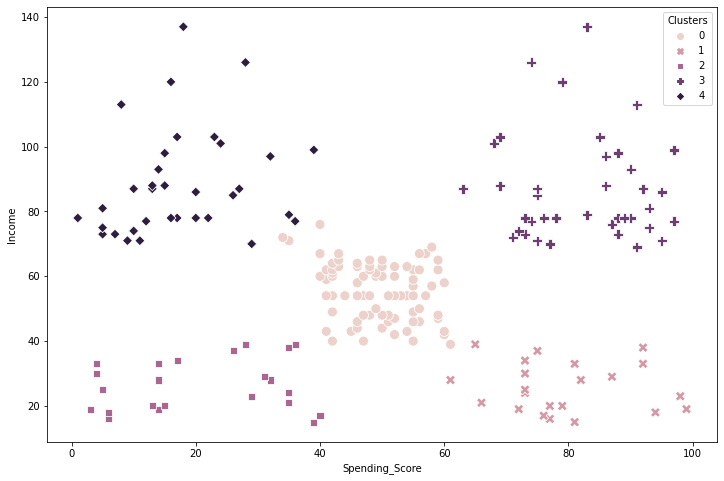

In [14]:
# Plotting Clusters on Chart using seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df, style='Clusters',s=100)

## Hierarchical Clustering

In [15]:
# Segrigating the data
data = df.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Using Agglomentric Clustering

In [16]:
# importing required libraries
from sklearn.cluster import AgglomerativeClustering

In [17]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [19]:
df['Hierarchical_Clusters'] = cluster.labels_
df.head()

,CustomerID,Genre,Age,Income,Spending_Score,Clusters,Hierarchical_Clusters
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,2,4


In [20]:
# If you want to check how many values has been assigned

df['Hierarchical_Clusters'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: Hierarchical_Clusters, dtype: int64

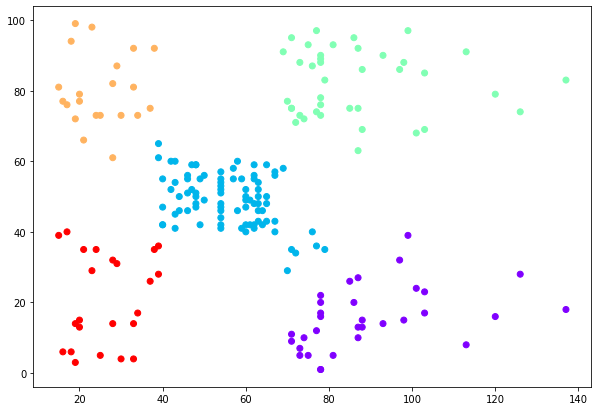

In [21]:
#plot the clusters to see how actually our data has been clustered

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 